### **TPOTRegressor**

Automated machine learning tool for optimizing machine learning pipelines.


In [1]:
!pip install tpot

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 896.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 5.5 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=045d7acd7a0737a313207f26f73191c92a418c1cfab673ccda430e423153aa72
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


## **Datase**t:*Sales_Product_Price_by_Store.csv* --(Regressor)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tpot import TPOTRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('/content/Sales_Product_Price_by_Store.csv')

# Feature Engineering
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday  # 0 = Monday, 6 = Sunday
df['Is_Holiday'] = df['Is_Holiday'].astype(int)
df = pd.get_dummies(df, columns=['Store', 'Product'], drop_first=True)
df.drop(columns=['Date'], inplace=True)

# Features and target variable
X = df.drop(columns=['Weekly_Units_Sold'])  # Drop target column
y = df['Weekly_Units_Sold']                  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the TPOT Regressor
tpot = TPOTRegressor(verbosity=2, random_state=42, generations=5, population_size=20)
tpot.fit(X_train, y_train)

# Get the best pipeline
print("Best Pipeline:")
print(tpot.fitted_pipeline_)

# Make predictions using the best pipeline
tpot_predictions = tpot.predict(X_test)

# Evaluate the TPOT model
tpot_mse = mean_squared_error(y_test, tpot_predictions)
tpot_r2 = r2_score(y_test, tpot_predictions)

print(f'TPOT Mean Squared Error: {tpot_mse}')
print(f'TPOT R² Score: {tpot_r2}')

# Export the best model if needed
tpot.export('best_model_pipeline.py')


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -4653.78870006543

Generation 2 - Current best internal CV score: -4653.78870006543

Generation 3 - Current best internal CV score: -4653.78870006543

Generation 4 - Current best internal CV score: -4620.089585630572

Generation 5 - Current best internal CV score: -4620.089585630572

Best pipeline: XGBRegressor(RidgeCV(input_matrix), learning_rate=0.5, max_depth=8, min_child_weight=3, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.6000000000000001, verbosity=0)
Best Pipeline:
Pipeline(steps=[('stackingestimator', StackingEstimator(estimator=RidgeCV())),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3861 entries, 0 to 3860
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Is_Holiday         3861 non-null   int64  
 1   Base Price         3861 non-null   float64
 2   Price              3861 non-null   float64
 3   Weekly_Units_Sold  3861 non-null   int64  
 4   Year               3861 non-null   int32  
 5   Month              3861 non-null   int32  
 6   Day                3861 non-null   int32  
 7   Weekday            3861 non-null   int32  
 8   Store_2            3861 non-null   bool   
 9   Store_3            3861 non-null   bool   
 10  Store_4            3861 non-null   bool   
 11  Store_5            3861 non-null   bool   
 12  Store_6            3861 non-null   bool   
 13  Store_7            3861 non-null   bool   
 14  Store_8            3861 non-null   bool   
 15  Store_10           3861 non-null   bool   
 16  Product_2          3861 

## **Model Parameter**

In [4]:
from tpot import TPOTRegressor
import pandas as pd

# Get the default parameters
params = TPOTRegressor().get_params()

# Create a DataFrame from the parameters
params_df = pd.DataFrame(params.items(), columns=['Parameter', 'Value'])

# Display the DataFrame
print(params_df)


                     Parameter  Value
0                  config_dict   None
1               crossover_rate    0.1
2                           cv      5
3         disable_update_check  False
4                   early_stop   None
5                  generations    100
6                     log_file   None
7           max_eval_time_mins      5
8                max_time_mins   None
9                       memory   None
10               mutation_rate    0.9
11                      n_jobs      1
12              offspring_size   None
13  periodic_checkpoint_folder   None
14             population_size    100
15                random_state   None
16                     scoring   None
17                   subsample    1.0
18                    template   None
19                    use_dask  False
20                   verbosity      0
21                  warm_start  False


### **To provide the parameter use**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


Mean Squared Error: 2510.9466128791914
Mean Absolute Error: 28.51047296603027
R² Score: 0.9482630491256714


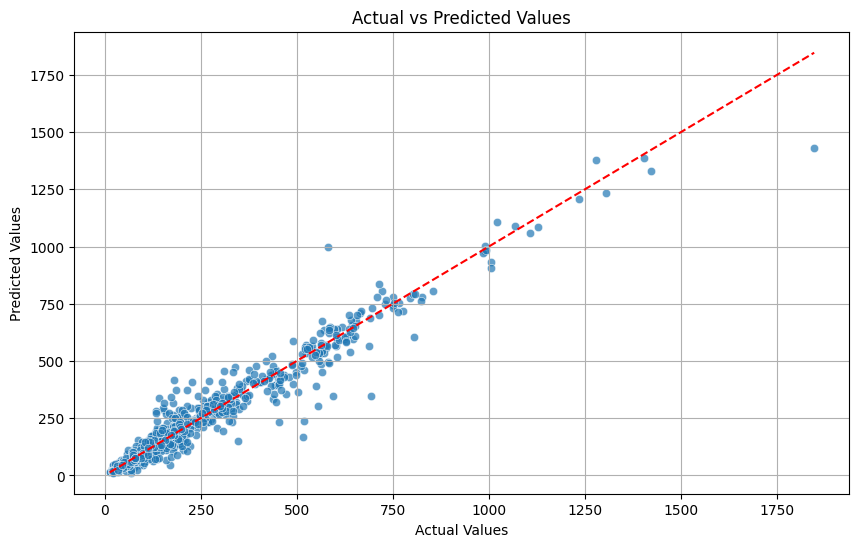

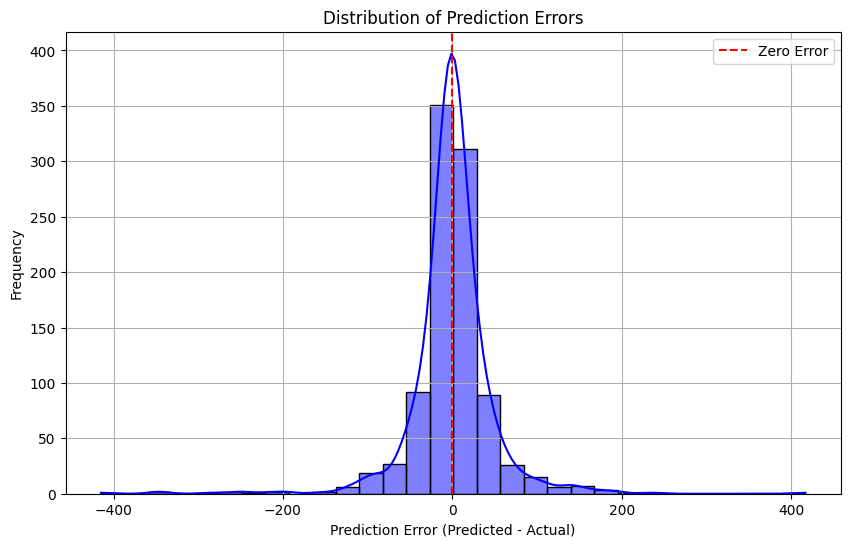

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from tpot.builtins import StackingEstimator
from xgboost import XGBRegressor
from tpot.export_utils import set_param_recursive
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
tpot_data = pd.read_csv('/content/Sales_Product_Price_by_Store.csv', sep=',')

# Convert 'Date' to datetime and extract features
tpot_data['Date'] = pd.to_datetime(tpot_data['Date'])
tpot_data['Year'] = tpot_data['Date'].dt.year
tpot_data['Month'] = tpot_data['Date'].dt.month
tpot_data['Day'] = tpot_data['Date'].dt.day
tpot_data['Weekday'] = tpot_data['Date'].dt.weekday
tpot_data = pd.get_dummies(tpot_data, columns=['Store', 'Product'], drop_first=True)
tpot_data.drop(columns=['Date'], inplace=True)

# Split the data into features and target
X = tpot_data.drop('Weekly_Units_Sold', axis=1)
y = tpot_data['Weekly_Units_Sold']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Define the pipeline
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=RidgeCV()),
    XGBRegressor(learning_rate=0.5, max_depth=8, min_child_weight=3, n_estimators=100,
                 n_jobs=1, objective="reg:squarederror", subsample=0.6, verbosity=0)
)

# Fit the model
exported_pipeline.fit(X_train, y_train)

# Make predictions
results = exported_pipeline.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, results)
mae = mean_absolute_error(y_test, results)
r2 = r2_score(y_test, results)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=results, alpha=0.7)  # Scatter plot of actual vs predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.title('Actual vs Predicted Values')  # Title of the plot
plt.xlabel('Actual Values')  # X-axis label
plt.ylabel('Predicted Values')  # Y-axis label
plt.grid()  # Add grid lines
plt.show()  # Display the plot

# Plotting the residuals (prediction errors)
errors = results - y_test  # Calculate errors
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True, color='blue')  # Histogram of errors with KDE
plt.axvline(0, color='red', linestyle='--', label='Zero Error')  # Line at zero error
plt.title('Distribution of Prediction Errors')  # Title of the plot
plt.xlabel('Prediction Error (Predicted - Actual)')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.legend()  # Show legend
plt.grid()  # Add grid lines
plt.show()  # Display the plot


In [6]:
tpot_data.columns

Index(['Is_Holiday', 'Base Price', 'Price', 'Weekly_Units_Sold', 'Year',
       'Month', 'Day', 'Weekday', 'Store_2', 'Store_3', 'Store_4', 'Store_5',
       'Store_6', 'Store_7', 'Store_8', 'Store_10', 'Product_2', 'Product_3'],
      dtype='object')

### **Dataset:** *Tips* - (Regressor)

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from tpot import TPOTRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the tips dataset
tpot_data = sns.load_dataset('tips')

# Display initial info
print(tpot_data.info())

# Convert categorical columns to 'category' type if not already done
categorical_cols = ['sex', 'smoker', 'day', 'time']
for col in categorical_cols:
    tpot_data[col] = tpot_data[col].astype('category')

# One-hot encode categorical features
tpot_data = pd.get_dummies(tpot_data, columns=categorical_cols, drop_first=True)

# Create new features
# 1. Tip as a percentage of the total bill
tpot_data['tip_percentage'] = (tpot_data['tip'] / tpot_data['total_bill']) * 100

# 2. Total number of people (size)
# Create a binary feature for large groups
tpot_data['is_large_group'] = (tpot_data['size'] >= 5).astype(int)

# Define features and target variable
features = tpot_data.drop('tip', axis=1)  # Dropping the target column
target = tpot_data['tip']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


In [8]:


# Initialize and fit the TPOT Regressor
tpot = TPOTRegressor(verbosity=2, random_state=42, generations=5, population_size=20)
tpot.fit(X_train, y_train)

# Make predictions
y_pred = tpot.predict(X_test)

# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R² Score:', r2_score(y_test, y_pred))

# Export the best pipeline
tpot.export('best_pipeline.py')


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.33535101642139775

Generation 2 - Current best internal CV score: -0.23648000000000002

Generation 3 - Current best internal CV score: -0.23648000000000002

Generation 4 - Current best internal CV score: -0.21292368087179486

Generation 5 - Current best internal CV score: -0.21292368087179486

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.9000000000000001, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
Mean Squared Error: 0.17059027551020386
Mean Absolute Error: 0.2206857142857142
R² Score: 0.8635246510607225


### **To provide the parameter use**

Mean Squared Error: 0.18335481950819668
Mean Absolute Error: 0.2382344262295082
R² Score: 0.8621832552329752


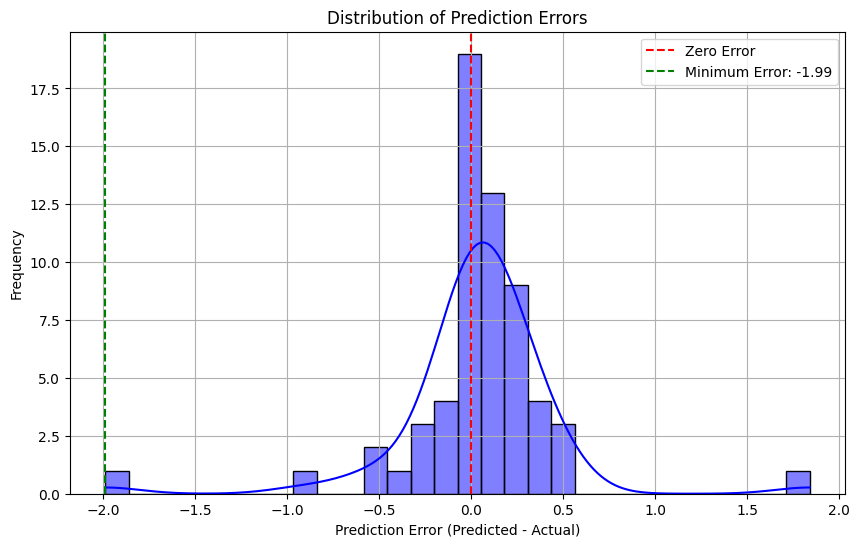

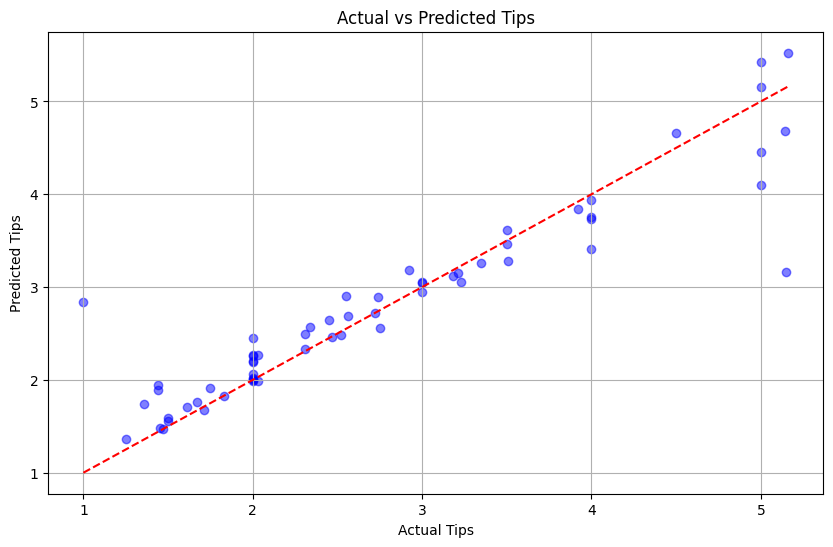

In [9]:
import numpy as np  # Importing NumPy, a library for numerical operations
import pandas as pd  # Importing Pandas, a library for data manipulation and analysis
from sklearn.ensemble import RandomForestRegressor  # Importing the Random Forest model for predictions
from sklearn.model_selection import train_test_split  # Importing a function to split data into training and testing sets
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Importing functions to evaluate model performance
import seaborn as sns  # Importing Seaborn, a library for data visualization
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting

# Load the 'tips' dataset from Seaborn
tpot_data = sns.load_dataset('tips')

# Convert specific columns (like 'sex', 'smoker', 'day', and 'time') to 'category' type for better handling
categorical_cols = ['sex', 'smoker', 'day', 'time']
for col in categorical_cols:
    tpot_data[col] = tpot_data[col].astype('category')  # Change column type

# Transform categorical columns into numeric format using one-hot encoding
tpot_data = pd.get_dummies(tpot_data, columns=categorical_cols, drop_first=True)  # Create dummy variables

# Create new features to enhance our dataset:
tpot_data['tip_percentage'] = (tpot_data['tip'] / tpot_data['total_bill']) * 100  # Calculate tip as a percentage
tpot_data['is_large_group'] = (tpot_data['size'] >= 5).astype(int)  # Indicate if group size is large (5 or more)

# Define the features (inputs) and the target variable (output)
X = tpot_data.drop('tip', axis=1)  # Features: all columns except 'tip'
y = tpot_data['tip']  # Target: the 'tip' column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)  # Randomly split data

# Initialize the Random Forest model with specific settings
exported_pipeline = RandomForestRegressor(
    bootstrap=True,  # Use bootstrapping for the model
    max_features=0.9,  # Use 90% of features when building trees
    min_samples_leaf=1,  # Minimum samples required at a leaf node
    min_samples_split=2,  # Minimum samples required to split an internal node
    n_estimators=100,  # Number of trees in the forest
    random_state=42  # Set random state for reproducibility
)

# Train the model using the training data
exported_pipeline.fit(X_train, y_train)

# Make predictions on the testing features
results = exported_pipeline.predict(X_test)  # Predict tips using the test features

# Evaluate the model's performance using various metrics
mse = mean_squared_error(y_test, results)  # Calculate Mean Squared Error
mae = mean_absolute_error(y_test, results)  # Calculate Mean Absolute Error
r2 = r2_score(y_test, results)  # Calculate R² Score

# Display the evaluation metrics
print("Mean Squared Error:", mse)  # Print Mean Squared Error
print("Mean Absolute Error:", mae)  # Print Mean Absolute Error
print("R² Score:", r2)  # Print R² Score, indicating how well the model explains the variability in the data

# Calculate the prediction errors
errors = results - y_test  # Calculate the difference between predicted and actual tips

# Plotting the distribution of prediction errors
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(errors, bins=30, kde=True, color='blue')  # Histogram of errors with Kernel Density Estimate
plt.axvline(0, color='red', linestyle='--', label='Zero Error')  # Line at zero error for reference

# Highlighting the minimum error
min_error = np.min(errors)  # Find the minimum error
plt.axvline(min_error, color='green', linestyle='--', label='Minimum Error: {:.2f}'.format(min_error))  # Line for minimum error

# Add title and labels to the plot
plt.title('Distribution of Prediction Errors')  # Title of the plot
plt.xlabel('Prediction Error (Predicted - Actual)')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.legend()  # Show the legend
plt.grid()  # Add grid lines to the plot
plt.show()  # Display the plot

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(y_test, results, color='blue', alpha=0.5)  # Scatter plot of actual vs. predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line for perfect prediction
plt.title('Actual vs Predicted Tips')  # Title of the plot
plt.xlabel('Actual Tips')  # X-axis label
plt.ylabel('Predicted Tips')  # Y-axis label
plt.grid()  # Add grid lines to the plot
plt.show()  # Display the plot


### **Loan dataset multiple algorithm**

R² Scores:
Linear Regression: 0.06
Decision Tree: -0.91
Random Forest: 0.02
Gradient Boosting: 0.05
AdaBoost: 0.03
Extra Trees: 0.00
Voting Ensemble: 0.03
Stacking Ensemble: 0.06


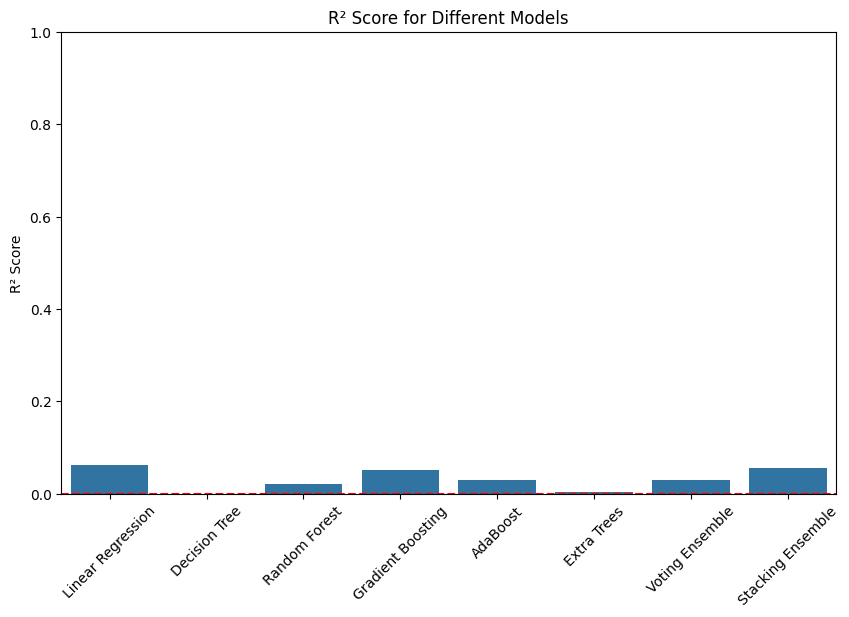

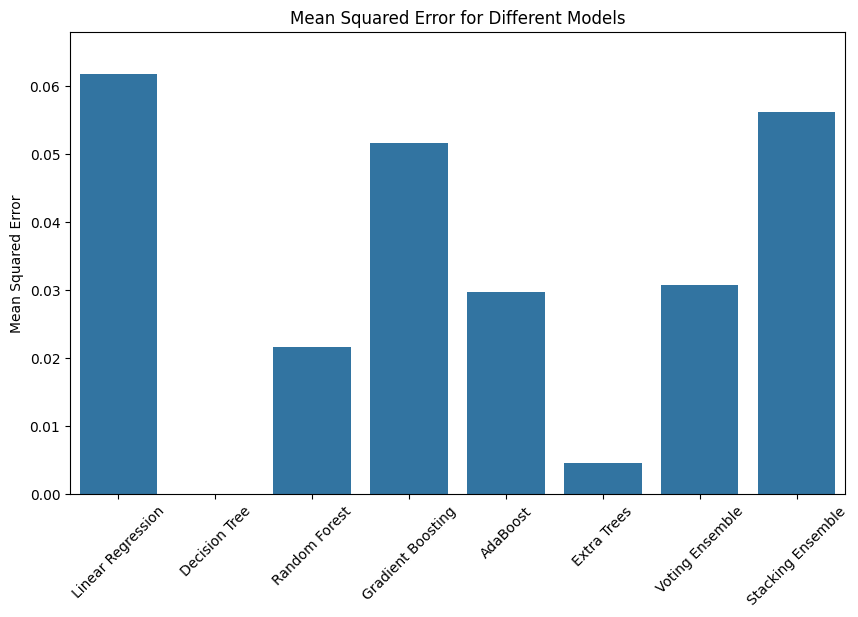

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                              AdaBoostRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor)
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/loan_data.csv')  # Update with your dataset path

# Encode categorical variables if necessary
le = LabelEncoder()
df['purpose'] = le.fit_transform(df['purpose'])  # Assuming 'purpose' is the only categorical variable

# Define features and target variable
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']  # Replace with your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Individual models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'Extra Trees': ExtraTreesRegressor(random_state=42)
}

# Dictionary to store results
results = {}

# Fit each model, predict, and calculate R² score
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results[name] = r2

# Ensemble model using Voting
voting_regressor = VotingRegressor(estimators=[(name, model) for name, model in models.items()])
voting_regressor.fit(X_train, y_train)

# Predict on the test set with the ensemble model
y_pred_voting = voting_regressor.predict(X_test)

# R² score for the ensemble model
r2_voting = r2_score(y_test, y_pred_voting)
results['Voting Ensemble'] = r2_voting

# Stacking
estimators = [(name, model) for name, model in models.items() if name != 'Linear Regression']  # Exclude Linear Regression
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_model.fit(X_train, y_train)

# Evaluate the stacking model
y_pred_stacking = stacking_model.predict(X_test)
r2_stacking = r2_score(y_test, y_pred_stacking)
results['Stacking Ensemble'] = r2_stacking

# Display results
print("R² Scores:")
for model, r2 in results.items():
    print(f"{model}: {r2:.2f}")

# Plotting the results r2 square
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('R² Score for Different Models')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Adjusted for R² score range
plt.axhline(0, color='red', linestyle='--')  # Line at R² = 0 for reference
plt.show()



# Plotting the results Mean square error
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Mean Squared Error for Different Models')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.ylim(0, max(results.values()) * 1.1)  # Slightly extend y-axis for better visibility
plt.show()



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int64  
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 1.0 MB


In [5]:
pip install tpot


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 10.2 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=a860d3fc39c8766ac398bc550af98cc92fe48db23ffaffe95bd5a78c1f1bc298
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


### **Dataset:Loan** __ (Classifier)

In [8]:
import pandas as pd
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv('/content/loan_data.csv')  # Update with your actual path

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode categorical features
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Separate features and target variable
X = df.drop('not.fully.paid', axis=1)  # Features
y = df['not.fully.paid']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the TPOT classifier
tpot = TPOTClassifier(verbosity=2, generations=5, population_size=20, random_state=42)
tpot.fit(X_train, y_train)

# Make predictions
y_pred = tpot.predict(X_test)

# Evaluate the model
print('Model Score:', tpot.score(X_test, y_test))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R² Score:', r2_score(y_test, y_pred))

# Export the best model
tpot.export('best_classifier.py')


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8397286673172791

Generation 2 - Current best internal CV score: 0.8403813236729292

Generation 3 - Current best internal CV score: 0.8403813236729292

Generation 4 - Current best internal CV score: 0.8403813236729292

Generation 5 - Current best internal CV score: 0.8403813236729292

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=100)
Model Score: 0.8413361169102297
Mean Squared Error: 0.15866388308977036
Mean Absolute Error: 0.15866388308977036
R² Score: -0.18542398062500642


### **To provide the parameter use**

In [9]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('/content/loan_data.csv')  # Update with your actual path

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode categorical features
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Separate features and target variable
X = df.drop('not.fully.paid', axis=1)  # Features
y = df['not.fully.paid']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Extra Trees Classifier
exported_pipeline = ExtraTreesClassifier(bootstrap=True, criterion="entropy",
                                         max_features=0.8, min_samples_leaf=3,
                                         min_samples_split=5, n_estimators=100)

# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 42)

exported_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = exported_pipeline.predict(X_test)

# Evaluate the model
print('Model Score:', exported_pipeline.score(X_test, y_test))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R² Score:', r2_score(y_test, y_pred))


Model Score: 0.8413361169102297
Mean Squared Error: 0.15866388308977036
Mean Absolute Error: 0.15866388308977036
R² Score: -0.18542398062500642


### **Dataset:Loan** __ (Regression)

In [18]:
import pandas as pd
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('/content/loan_data.csv')  # Update with your actual path

# Identify categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(exclude=['object']).columns.tolist()
numerical_features.remove('int.rate')  # Assuming 'int.rate' is your target variable

# Separate features and target variable
X = df[categorical_features + numerical_features]  # Features
y = df['int.rate']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a ColumnTransformer to handle categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),  # Pass-through for numerical features
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features),  # One-hot encode categorical features
    ])

# Create a pipeline with preprocessing and TPOTRegressor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', TPOTRegressor(verbosity=2, generations=5, population_size=20, random_state=42)),
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R² Score:', r2_score(y_test, y_pred))

# Export the best model
pipeline.named_steps['regressor'].export('best_regressor.py')  # Access TPOTRegressor from pipeline


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.00019200486149034912

Generation 2 - Current best internal CV score: -0.00019200486149034912

Generation 3 - Current best internal CV score: -0.00018484152995380815

Generation 4 - Current best internal CV score: -0.000182477922019804

Generation 5 - Current best internal CV score: -0.0001823758798817602

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.7500000000000001, min_samples_leaf=2, min_samples_split=4, n_estimators=100)
Mean Squared Error: 0.00017341754674745965
Mean Absolute Error: 0.008933896825293997
R² Score: 0.7480955811901726
